# Machine learning with scikit-learn

## Supervised learning
data comes with attributes we want to predict

- Classification: Identifying which category an object belongs to. Application: Spam detection.
- Regresion: Predicting an attribute associated with an object. Application: stock prices prediction.

## Unsupervised learning
- Clustering: automatic grouping of similar objects into sets. Application: Customer segmentation
- Density estimation. 

## Training set and testing set

- Training set
- Testing set



In [1]:
# Examples
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# from sklearn import datasets
# iris = datasets.load_iris()
# digits = datasets.load_digits()
# iris

In [2]:
poke_data = pd.read_csv('poke_clean.csv')

In [3]:
poke_data

,Unnamed: 0,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,t_Bug,...,t_Ghost,t_Grass,t_Ground,t_Ice,t_Normal,t_Poison,t_Psychic,t_Rock,t_Steel,t_Water
0,0,318,45,49,49,65,65,45,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,405,60,62,63,80,80,60,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,525,80,82,83,100,100,80,1,0,...,0,1,0,0,0,0,0,0,0,0
3,3,625,80,100,123,122,120,80,1,0,...,0,1,0,0,0,0,0,0,0,0
4,4,309,39,52,43,60,50,65,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,600,50,100,150,100,150,50,6,0,...,0,0,0,0,0,0,0,1,0,0
796,796,700,50,160,110,160,110,110,6,0,...,0,0,0,0,0,0,0,1,0,0
797,797,600,80,110,60,150,130,70,6,0,...,0,0,0,0,0,0,1,0,0,0
798,798,680,80,160,60,170,130,80,6,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
poke_data.head()

,Unnamed: 0,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,t_Bug,...,t_Ghost,t_Grass,t_Ground,t_Ice,t_Normal,t_Poison,t_Psychic,t_Rock,t_Steel,t_Water
0,0,318,45,49,49,65,65,45,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,405,60,62,63,80,80,60,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,525,80,82,83,100,100,80,1,0,...,0,1,0,0,0,0,0,0,0,0
3,3,625,80,100,123,122,120,80,1,0,...,0,1,0,0,0,0,0,0,0,0
4,4,309,39,52,43,60,50,65,1,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
poke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  800 non-null    int64
 1   Total       800 non-null    int64
 2   HP          800 non-null    int64
 3   Attack      800 non-null    int64
 4   Defense     800 non-null    int64
 5   Sp. Atk     800 non-null    int64
 6   Sp. Def     800 non-null    int64
 7   Speed       800 non-null    int64
 8   Generation  800 non-null    int64
 9   t_Bug       800 non-null    int64
 10  t_Dark      800 non-null    int64
 11  t_Dragon    800 non-null    int64
 12  t_Electric  800 non-null    int64
 13  t_Fairy     800 non-null    int64
 14  t_Fighting  800 non-null    int64
 15  t_Fire      800 non-null    int64
 16  t_Flying    800 non-null    int64
 17  t_Ghost     800 non-null    int64
 18  t_Grass     800 non-null    int64
 19  t_Ground    800 non-null    int64
 20  t_Ice       800 non-null    int6

In [6]:
poke_data.isnull().sum()

Unnamed: 0    0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
t_Bug         0
t_Dark        0
t_Dragon      0
t_Electric    0
t_Fairy       0
t_Fighting    0
t_Fire        0
t_Flying      0
t_Ghost       0
t_Grass       0
t_Ground      0
t_Ice         0
t_Normal      0
t_Poison      0
t_Psychic     0
t_Rock        0
t_Steel       0
t_Water       0
dtype: int64

In [7]:
bins = (2, 80, 200)
group_names = ['bad', 'good']


In [8]:
poke_data['Attack'] = pd.cut(poke_data['Attack'], bins = bins, labels=group_names)
poke_data['Attack'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [9]:
label_attack = LabelEncoder()
poke_data['Attack'] = label_attack.fit_transform(poke_data['Attack'])

In [10]:
poke_data.head()

,Unnamed: 0,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,t_Bug,...,t_Ghost,t_Grass,t_Ground,t_Ice,t_Normal,t_Poison,t_Psychic,t_Rock,t_Steel,t_Water
0,0,318,45,0,49,65,65,45,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,405,60,0,63,80,80,60,1,0,...,0,1,0,0,0,0,0,0,0,0
2,2,525,80,1,83,100,100,80,1,0,...,0,1,0,0,0,0,0,0,0,0
3,3,625,80,1,123,122,120,80,1,0,...,0,1,0,0,0,0,0,0,0,0
4,4,309,39,0,43,60,50,65,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
poke_data['Attack'].value_counts()

0    459
1    341
Name: Attack, dtype: int64

<Axes: ylabel='count'>

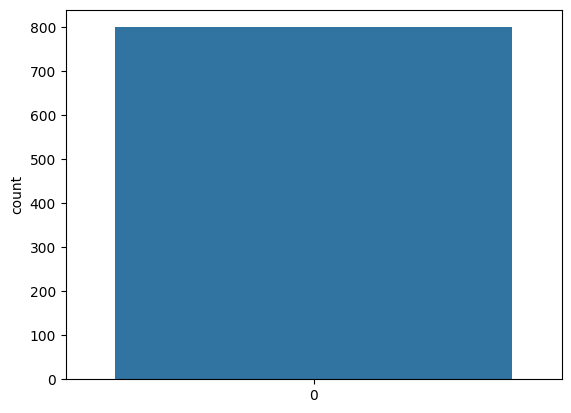

In [12]:
sns.countplot(poke_data['Attack'])

In [13]:
X = poke_data.drop('Attack', axis= 1)
y = poke_data['Attack']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_test

,Unnamed: 0,Total,HP,Defense,Sp. Atk,Sp. Def,Speed,Generation,t_Bug,t_Dark,...,t_Ghost,t_Grass,t_Ground,t_Ice,t_Normal,t_Poison,t_Psychic,t_Rock,t_Steel,t_Water
172,172,314,50,64,44,48,43,2,0,0,...,0,0,0,0,0,0,0,0,0,1
333,333,630,70,230,60,80,50,3,0,0,...,0,0,0,0,0,0,0,0,1,0
290,290,395,60,50,100,50,65,3,1,0,...,0,0,0,0,0,0,0,0,0,0
294,294,340,60,50,60,70,50,3,0,0,...,0,0,0,0,0,0,0,0,0,1
450,450,523,80,79,95,79,70,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,490,65,57,95,85,105,1,0,0,...,0,0,0,0,0,0,0,0,0,0
257,257,305,45,15,85,65,65,2,0,0,...,0,0,0,1,0,0,0,0,0,0
23,23,579,83,80,135,80,121,1,0,0,...,0,0,0,0,1,0,0,0,0,0
268,268,700,100,150,95,120,71,2,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [16]:
X_test

array([[-1.01365691e+00, -1.07303650e+00, -8.10864190e-01, ...,
        -1.97385508e-01, -1.38232703e-01,  2.64575131e+00],
       [-3.14058741e-01,  1.60227912e+00,  2.79696020e-03, ...,
        -1.97385508e-01,  7.23417814e+00, -3.77964473e-01],
       [-5.00907941e-01, -3.87275219e-01, -4.04033615e-01, ...,
        -1.97385508e-01, -1.38232703e-01, -3.77964473e-01],
       ...,
       [-1.66111111e+00,  1.17050350e+00,  5.31676708e-01, ...,
        -1.97385508e-01, -1.38232703e-01, -3.77964473e-01],
       [-5.96505205e-01,  2.19491233e+00,  1.22328869e+00, ...,
         5.06622805e+00, -1.38232703e-01, -3.77964473e-01],
       [-8.87642330e-01,  5.01674594e-01,  8.16458110e-01, ...,
        -1.97385508e-01, -1.38232703e-01,  2.64575131e+00]])

# Forest classifier

In [17]:
# Random Forest classifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [20]:
pred_rfc[:10]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [21]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        96
           1       0.75      0.84      0.79        64

    accuracy                           0.82       160
   macro avg       0.82      0.83      0.82       160
weighted avg       0.83      0.82      0.83       160

[[78 18]
 [10 54]]


# Neural Network.